In [48]:
#Packages for datetime conversions
import time
from datetime import datetime as dt
from datetime import timedelta as td

print('Running!')
start_time = time.time()

#Loading Data Tool Packages
import pandas as pd
import numpy as np

#Packages for plotting
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#statistical packages
import scipy.stats

#Packages for Maps: longitude and latitude
from geopy.geocoders import Nominatim
from branca.element import Figure
import folium
import requests

#Import modules for preprocessing:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

#Import models from scikit learn module:
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

#Model Evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("Modules took:", (time.time() - start_time)/60, "minutes to run")
print('Finished')

Running!
Modules took: 3.2718976338704424e-05 minutes to run
Finished


In [27]:
fhv_data = pd.read_csv('fhv_data_and_taxi_zones_id.csv')
fhv_data = fhv_data.drop(fhv_data.columns[0],axis = 1)
#print(list(fhv_data.columns.values))
fhv_data.head(5)

C:\Users\chappie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,LocationID,Borough,Zone,service_zone,Type,...,Longitude,Latitude,Type_of_Place,time_of_ride,pickup_day,pickup_hour,dropoff_day,dropoff_hour,time_of_ride_minutes,pickup_weekday
0,B00009,2019-12-01 00:47:00,2019-12-01 00:52:00,264,264,264,Unknown,NV,NaN,NaN,...,38.80261,-116.419389,"['administrative_area_level_1', 'political']",0 days 00:05:00.000000000,1,0,1,0,5.000000,Sunday
1,B00009,2019-12-01 00:27:00,2019-12-01 00:44:00,264,264,264,Unknown,NV,NaN,NaN,...,38.80261,-116.419389,"['administrative_area_level_1', 'political']",0 days 00:17:00.000000000,1,0,1,0,17.000000,Sunday
2,B00014,2019-12-01 00:42:18,2019-12-01 01:31:31,264,264,264,Unknown,NV,NaN,NaN,...,38.80261,-116.419389,"['administrative_area_level_1', 'political']",0 days 00:49:13.000000000,1,0,1,1,49.216667,Sunday
3,B00014,2019-12-01 00:43:08,2019-12-01 01:07:38,264,264,264,Unknown,NV,NaN,NaN,...,38.80261,-116.419389,"['administrative_area_level_1', 'political']",0 days 00:24:30.000000000,1,0,1,1,24.500000,Sunday
4,B00037,2019-12-01 00:10:16,2019-12-01 00:21:08,264,71,264,Unknown,NV,NaN,NaN,...,38.80261,-116.419389,"['administrative_area_level_1', 'political']",0 days 00:10:52.000000000,1,0,1,0,10.866667,Sunday


Text(0.5, 1.0, 'Correlation Among Features:')

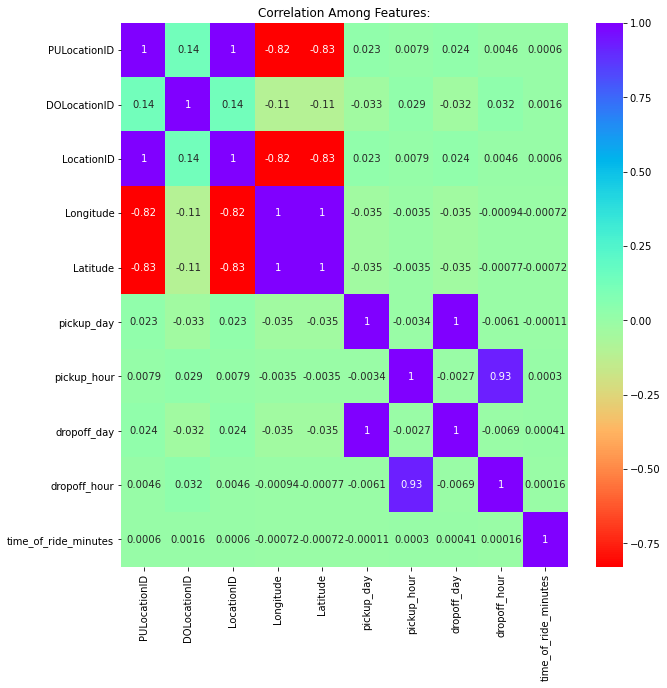

In [28]:
#Plot HeatMap
plt.rcParams['figure.figsize'] = (10, 10)
sns.heatmap(fhv_data.corr(), annot = True , cmap = 'rainbow_r', annot_kws = {"Size":10})
plt.title( "Correlation Among Features:")

In [134]:
#sns.heatmap(fhv_data.isnull(),yticklabels=False,cbar=False)

In [29]:
#Calculating Statistics
#print(fhv_data.time_of_ride_minutes.describe())
print(fhv_data.time_of_ride_minutes.head(5))
fhv_data.time_of_ride_minutes = fhv_data.time_of_ride_minutes[fhv_data.time_of_ride_minutes <= 360]
minimum_ridetime = np.min(fhv_data.time_of_ride_minutes)
maximum_ridetime = np.max(fhv_data.time_of_ride_minutes)
mean_ridetime = np.mean(fhv_data.time_of_ride_minutes)
median_ridetime = np.median(fhv_data.time_of_ride_minutes)
std_ridetime = np.std(fhv_data.time_of_ride_minutes)

#Printing statistics
print("Statistics for dataset (Minutes):")
print("Minimum: {:f}".format(minimum_ridetime))
print("Maximum: {:f}".format(maximum_ridetime))
print("Mean: {:f}".format(mean_ridetime))
print("Median: {:f}".format(median_ridetime))
print("Standard deviation: {:f}".format(std_ridetime))

0     5.000000
1    17.000000
2    49.216667
3    24.500000
4    10.866667
Name: time_of_ride_minutes, dtype: float64
Statistics for dataset (Minutes):
Minimum: 0.016667
Maximum: 360.000000
Mean: 23.882445
Median: nan
Standard deviation: 27.322057


### Understanding the Distribution of Data

C:\Users\chappie\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


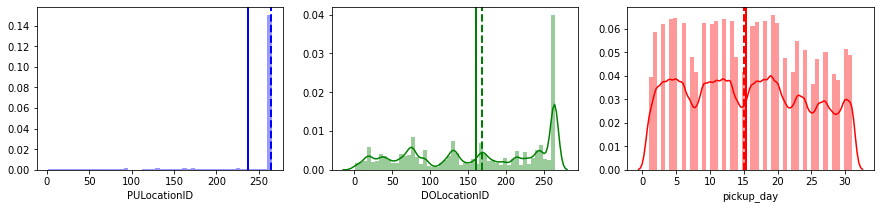

In [70]:
colors = ['blue','green','red','yellow','purple','orange','gray']
fig, axs = plt.subplots(ncols=3,figsize=(15,3))

plt.figure(1)

for i, var in enumerate(['PULocationID', 'DOLocationID', 'pickup_day']):
    plt.subplot(131 + i)
    sns.distplot(fhv_data[var],  color = colors[i])
    plt.axvline(fhv_data[var].mean(), color=colors[i], linestyle='solid', linewidth=2)
    plt.axvline(fhv_data[var].median(), color=colors[i], linestyle='dashed', linewidth=2)

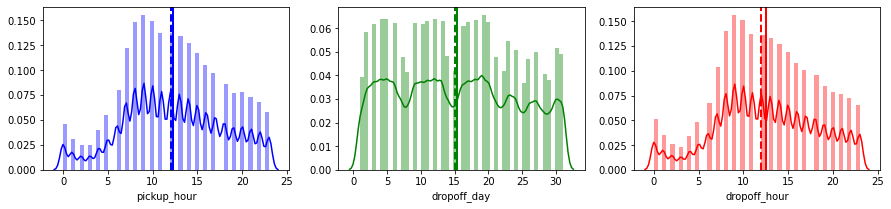

In [72]:
colors = ['blue','green','red']
fig, axs = plt.subplots(ncols=3,figsize=(15,3))

plt.figure(1)

for i, var in enumerate(['pickup_hour','dropoff_day','dropoff_hour']):
    plt.subplot(131 + i)
    sns.distplot(fhv_data[var],  color = colors[i])
    plt.axvline(fhv_data[var].mean(), color=colors[i], linestyle='solid', linewidth=2)
    plt.axvline(fhv_data[var].median(), color=colors[i], linestyle='dashed', linewidth=2)

In [ ]:
#sns.heatmap(fhv_data[['pickup_hour','dropoff_day','dropoff_hour','time_of_ride_minutes']], annot=True)

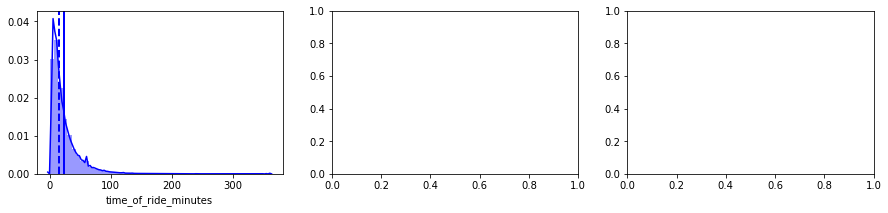

In [68]:
colors = ['blue','green','red']
fig, axs = plt.subplots(ncols=3,figsize=(15,3))

plt.figure(1)

for i, var in enumerate(['time_of_ride_minutes']):
    plt.subplot(131 + i)
    sns.distplot(fhv_data[var],  color = colors[i])
    plt.axvline(fhv_data[var].mean(), color=colors[i], linestyle='solid', linewidth=2)
    plt.axvline(fhv_data[var].median(), color=colors[i], linestyle='dashed', linewidth=2)

#### https://medium.com/@vrushalitandel1/housing-price-prediction-step-by-step-implementation-of-machine-learning-project-9939e6c7c59e

### Preparing / Prepping the Data

In [44]:
#features = fhv_data.drop(['time_of_ride','ZoneandBorough','pickup_datetime','dropoff_datetime','Borough','Zone','service_zone','Type','Type_of_Place','pickup_weekday','dispatching_base_num'], axis = 1)
features_x = fhv_data.drop(['LocationID','time_of_ride','ZoneandBorough','pickup_datetime','dropoff_datetime','Borough','Zone','service_zone','Type','Type_of_Place','pickup_weekday','dispatching_base_num'], axis = 1)

print(features_x.isnull().sum())
features_x.dropna(inplace=True)
print("\nAfter dropping NA values:\n")
print(features_x.isnull().sum())

features_y = features_x.drop('time_of_ride_minutes',axis =1)

PULocationID               0
DOLocationID               0
LocationID                 0
Longitude                  0
Latitude                   0
pickup_day                 0
pickup_hour                0
dropoff_day                0
dropoff_hour               0
time_of_ride_minutes    5247
dtype: int64

After dropping NA values:

PULocationID            0
DOLocationID            0
LocationID              0
Longitude               0
Latitude                0
pickup_day              0
pickup_hour             0
dropoff_day             0
dropoff_hour            0
time_of_ride_minutes    0
dtype: int64


In [45]:
X_train, X_test, y_train, y_test = train_test_split(features_x, features_y, test_size = 0.3, random_state = 42)
print("Rows in X set:", X_train.shape, X_test.shape, "\nRows in Y set:", y_train.shape, y_test.shape)

Rows in X set: (1227906, 10) (526246, 10) 
Rows in Y set: (1227906, 9) (526246, 9)


[-1.98951966e-13 -6.18456397e-11 -1.98951966e-13  5.16777732e-11
  1.63922209e-10  2.73558953e-12  5.04485342e-13  1.23101529e-12
  2.02859951e-12]


Text(0.5, 1.0, 'Minutes vs Predicted')

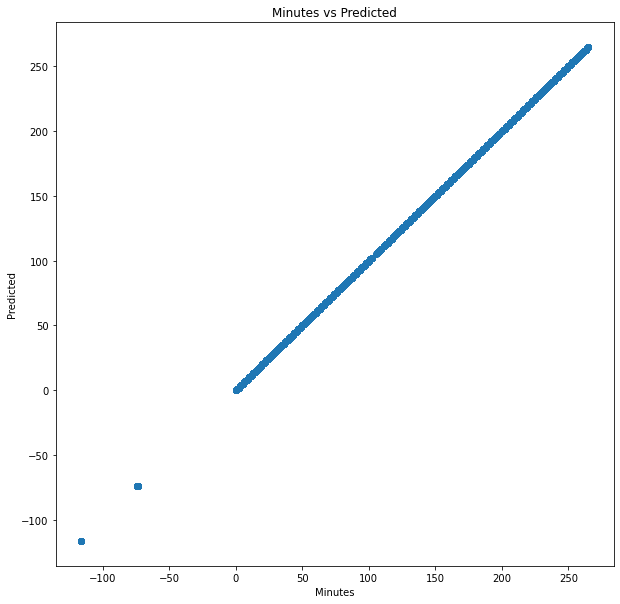

In [46]:
#Linear Regression (models imported already)

LR = LinearRegression()
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Total Ride Time (TRT)")
plt.ylabel("Predicted")
plt.title("TRT vs Predicted")

In [59]:
#Model Evaluation
MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.30f}".format(MSE))

Mean Squared Error: 0.000000000000000000000270634822


In [62]:
#R2_SCORE
y_train_predict = LR.predict(X_train)
RMSE = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
R2 = r2_score (y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(RMSE))
print('R2 score is {}'.format(R2))
print("\n")

# model evaluation for testing set
y_test_predict = LR.predict(X_test)
RMSE_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
R2_test = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(RMSE_test))
print('R2 score is {}'.format(R2_test))


The model performance for training set
--------------------------------------
RMSE is 1.6452198335732856e-11
R2 score is 1.0


The model performance for testing set
--------------------------------------
RMSE is 1.645098239303216e-11
R2 score is 1.0


In [64]:
y_pred = LR.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

ValueError: continuous-multioutput is not supported

In [12]:
from sklearn.preprocessing import PolynomialFeatures


df_x = features
df_y = fhv_data['time_of_ride_minutes']

#Polynomial Features for data set
pft = PolynomialFeatures (degree = 3)
X_scaled = preprocessing.scale(features)
X_polynomial = pft.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state = 42)

#Print shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

NameError: name 'X_train' is not defined

In [ ]:
#alpha is the regularization parameter
LM = linear_model.Ridge(alpha = 300)
xtrain, xtest, ytrain, ytest = train_test_split(df_x, df_y, test_size=0.15)
LM.fit(xtrain, ytrain)

#Prediction
predictionTestSet = LM.predict(xtest)

from sklearn.metrics import mean_squared_error
errorTestSet = mean_squared_error(ytest, predictionTestSet)

print("Predicted value for test set: \n\n{}\n".format(predictionTestSet))
print("Original value for test set: \n\n{}".format(ytest))
print("Error in test set: {:.2f}\n".format(errorTestSet))

## Ridge Regression
##### Introduces small amount of bias and has less variance to get a better fit. Minimizes the sum of the squared residuals.
##### penalty: lambda * the slope^2

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1,0.5, 1]
for a in alphas:
    model = Ridge(alpha = a, normalize=True).fit(df_x,df_y)
    score = model.score(df_x,df_y)
    y_pred = model.predict(df_x)
    mse = mean_squared_error(df_y, y_pred) 
    print("Alpha:{0:.6f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, score, mse, np.sqrt(mse)))
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [145]:
#Splitting Data

##########################
#Using Stratified train split (Same Size train split for safe and not safe)...
#Adding Regularization & ParameterGrid Search for best matrix
#Looking at ROC Area
#feature engineering (all factors can indiciate whether it is safe or not)
##########################

traindata, testdata = train_test_split(fhv_data, test_size = 0.3)

#Grabbing Features and seperating from Predictions
#df_x = features
#df_y = fhv_data['time_of_ride_minutes']
trainingKeys = datafortraining.columns

#Training and Testing Datasets
trainingX = traindata[trainingKeys]
trainingY = traindata['logbioconc']
testingX = testdata[trainingKeys]
testingY = testdata['logbioconc']

#Preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(trainingX)

KeyError: "['KOW type' 'logbioconc' 'BCFbioconc'] not found in axis"

In [ ]:
training_set = features.values
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)